**<h1 style="color:orange">EXERCISE CLASS 1 (Part 1/2)</h3>**

# **Review of basic statistical concepts** 

Chapter 3-4, D.C. Montgomery: "Statistical Quality Control - an introduction", 7th Ed., Wiley







## <h1 style="color:orange">Statistical Inference</h3>

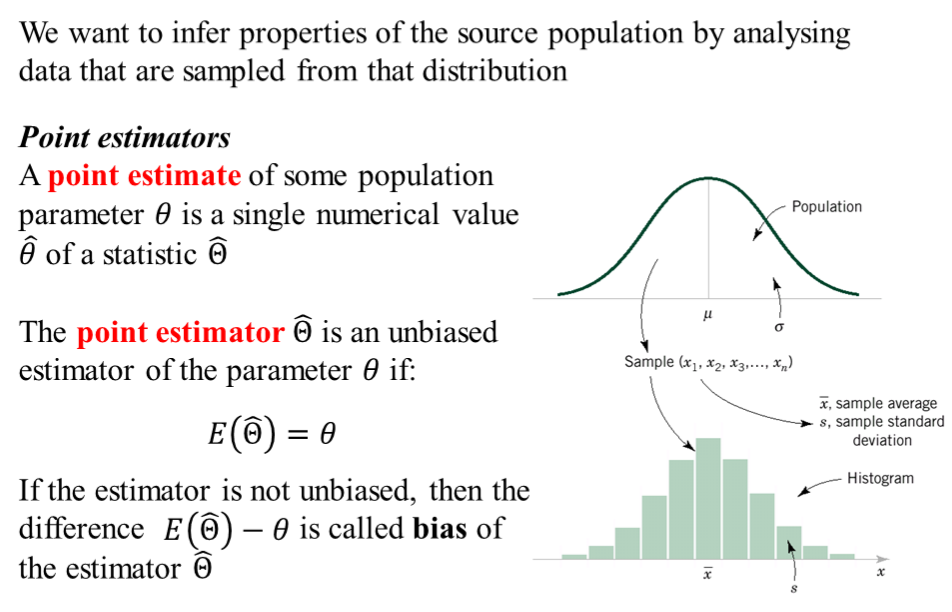

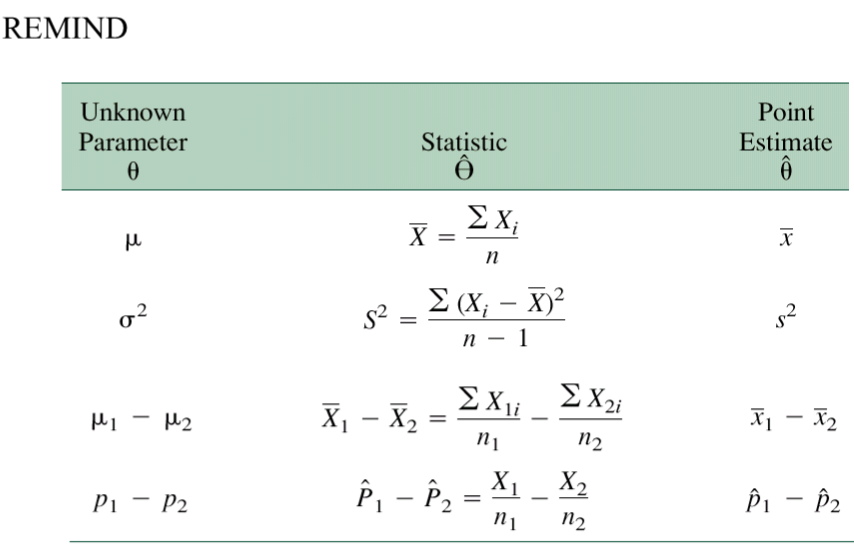

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import qdatoolkit as qda

### EXAMPLE 1: *Prob( μ ≥ μ0 )*

A synthetic fiber used in manufacturing industry has an ultimate tensile strength that is normally distributed with mean 75.5 psi and standard deviation 3.5 psi. 

Compute the probability that a random sample of 6 observations has a sample mean larger than 75.75 psi.

In [ ]:
# Input data
mu = 75.5       # Mean
sigma = 3.5     # Standard deviation

Probability that a random sample of 6 observations has a sample mean larger than 75.75 psi:

$$\mu = 75.5$$
$$\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}} = \frac{3.5}{\sqrt{6}}$$
$$P(\bar{X} \geq \mu_0) = P(\frac{\bar{X} - \mu}{\sigma_{\bar{X}}} \geq \frac{\mu_0 - \mu}{\sigma_{\bar{X}}}) = P(Z \geq \frac{75.75 - 75.5}{1.429}) = 1 - P(Z \leq 0.175)$$

In [ ]:
n = 6          # Number of samples
mu0 = 75.75    # Hypothesized mean

# Under the assumption of normality, the probability of observing a sample mean larger than mu0 is: 
Z_0 = (mu0 - mu)/(sigma/np.sqrt(n))
prob = 1 - stats.norm.cdf(Z_0)
print('The probability of observing a sample mean larger than mu0 is: %.3f' % prob)

### EXAMPLE 2: *probability of mean difference*

A random sample of size 16 is drawn from a normal population with mean 75 and standard deviation 8. A second sample of size 9 is drawn from a normal population with mean 70 and standard deviation 12.

a) Compute the probability that the sample mean difference between the first and the second sample is greater than 4 (assume that the two populations are independent).

b) Compute the probability that the sample mean difference between the first and the second sample ranges between 3.5 and 5.5 (same assumption).

In [ ]:
# Input data
n1 = 16          # Number of samples
mu1 = 75         # Mean
sigma1 = 8       # Standard deviation

n2 = 9           # Number of samples
mu2 = 70         # Mean
sigma2 = 12      # Standard deviation

#### Point a - *Prob( μ1 - μ2 ≤ μ0 )*

Compute the probability that the sample mean difference between the first and the second sample is greater than 4 (assume that the two populations are independent).

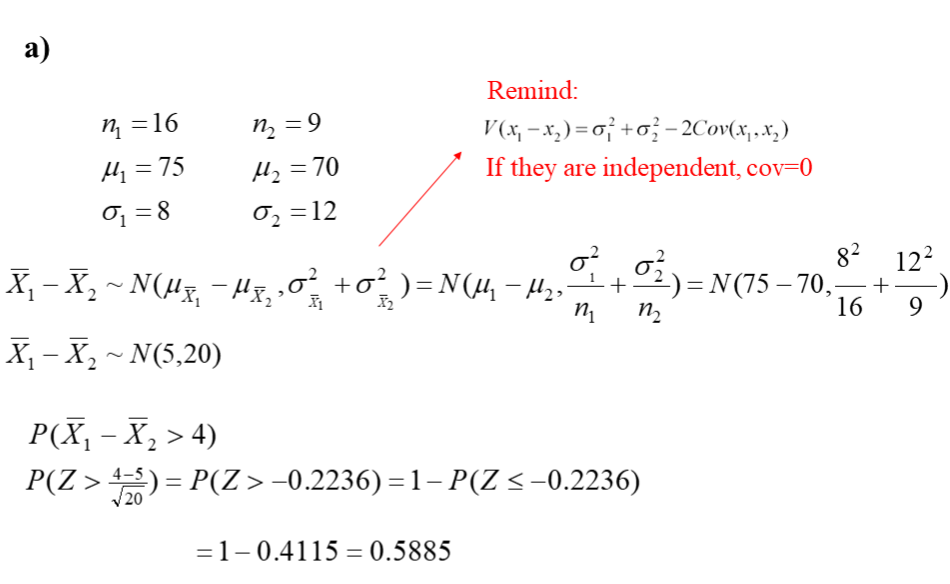

In [ ]:
# Point a
# Compute the mean and the variance of the difference between the two populations

mu_diff = mu1 - mu2 
mu0 = 4                                                 # Difference between the means
sigma_diff = np.sqrt(sigma1**2/n1 + sigma2**2/n2)       # the operator ** stands for ^ (i.e., power of)

prob = 1 - stats.norm.cdf((mu0 - mu_diff)/sigma_diff)   # P(X1 - X2 > mu0) = P(Z > (mu0 - mu_diff)/sigma_diff)

print('Probability of the difference between the means being greater than %.1f is %.4f' % (mu0, prob))

#### Point b - *Prob( L ≤ μ1 - μ2 ≤ U )*

Compute the probability that the sample mean difference between the first and the second sample ranges between 3.5 and 5.5 (same assumption).


> We can use he following formula to compute the probability:
> $$Pr(3.5 \leq \bar{X}_1 - \bar{X}_2 \leq 5.5) = Pr(\frac{3.5 - 5}{\sqrt{20}} \leq Z \leq \frac{5.5 - 5}{\sqrt{20}}) = Pr(Z \leq \frac{5.5 - 5}{\sqrt{20}}) - Pr(Z \leq \frac{3.5 - 5}{\sqrt{20}})$$

In [ ]:
# Point b
lower_bound = 3.5      # Lower bound of the interval
upper_bound = 5.5      # Upper bound of the interval

# P(lower_bound < X1 - X2 < upper_bound) = P(X1 - X2 < upper_bound) - P(X1 - X2 < lower_bound)
prob = stats.norm.cdf((upper_bound - mu_diff)/sigma_diff) - stats.norm.cdf((lower_bound - mu_diff)/sigma_diff)

print('Probability of the difference between the means being between %.1f and %.1f is %.4f' % (lower_bound, upper_bound, prob))

**<h1 style="color:orange">Hypothesis testing</h1>**

> A ***statistical hypotesis*** is a statement either about the **parameters** of a probability distribution or the parameters of a model.
>
Example: hypotesis testing on a population mean

-  $H_0$:  $\mu$ = 50 is the *null hypotesis*

- $H_1$:  $\mu$ $\neq$ 50 is the *alternative hypotesis*

> Taking a random sample from a population, a *test statistic* is computed. Then, it is possible to reject or fail to reject the null hypotesis $H_0$. 
>
> Part of the testing procedure is specifying the set of values for the test statistic that leads to the rejection of $H_0$ (**critical region**)

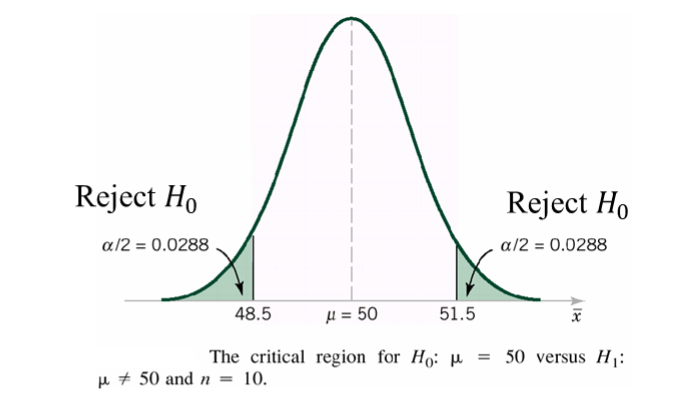

> Two kind of errors can be commited when testing hypotesis: 

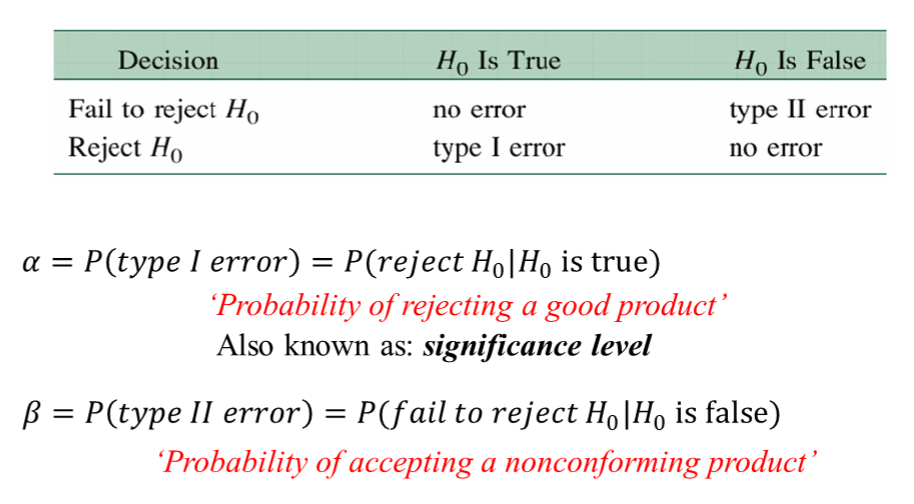

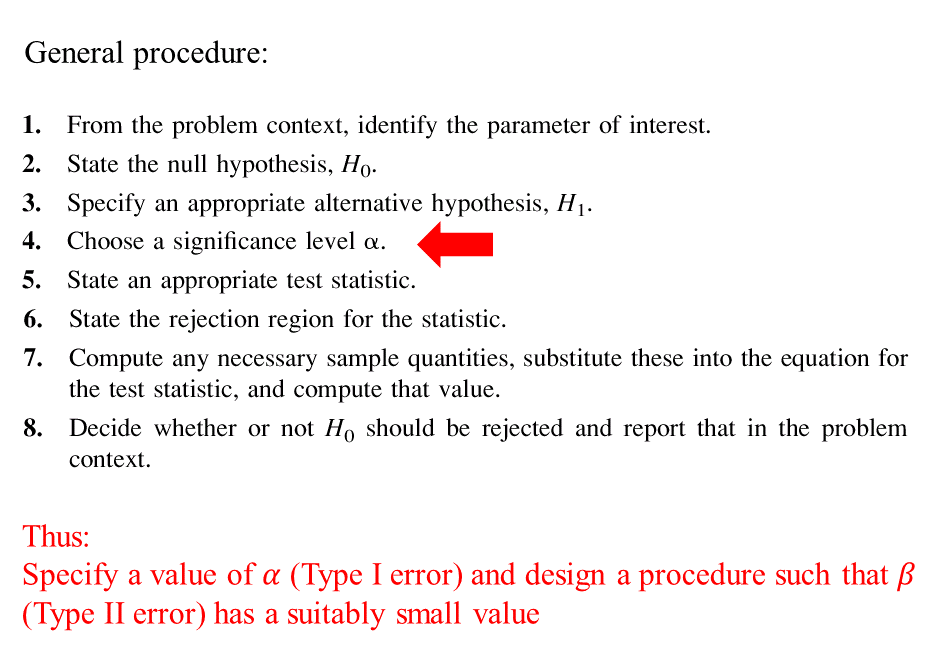

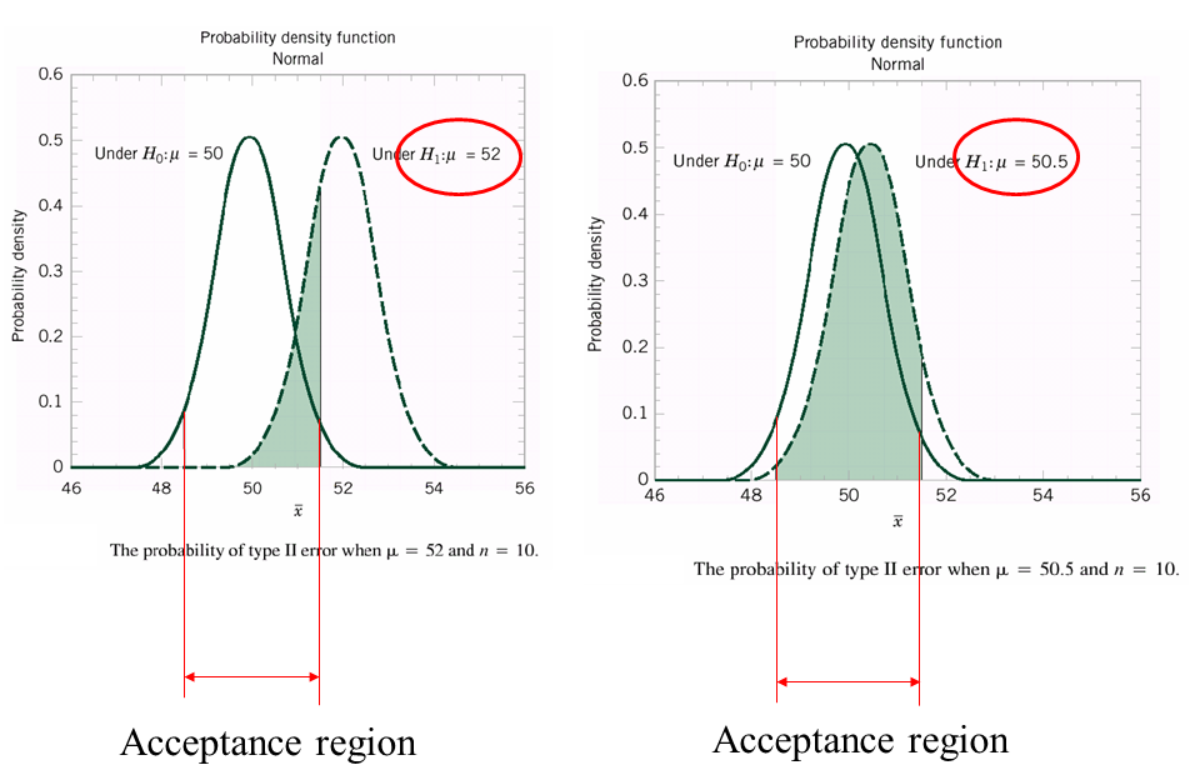{width=10}



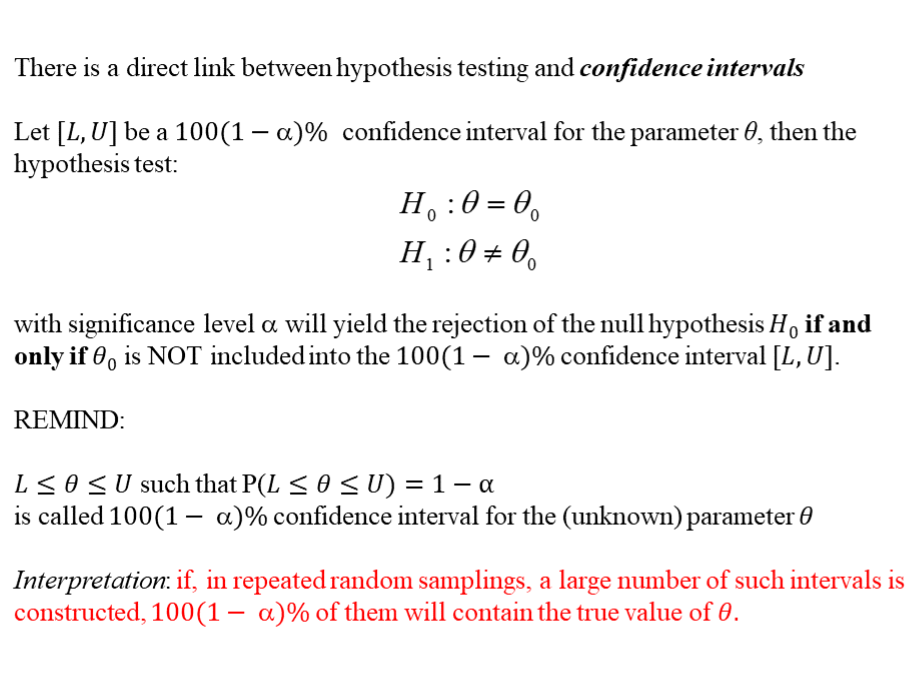

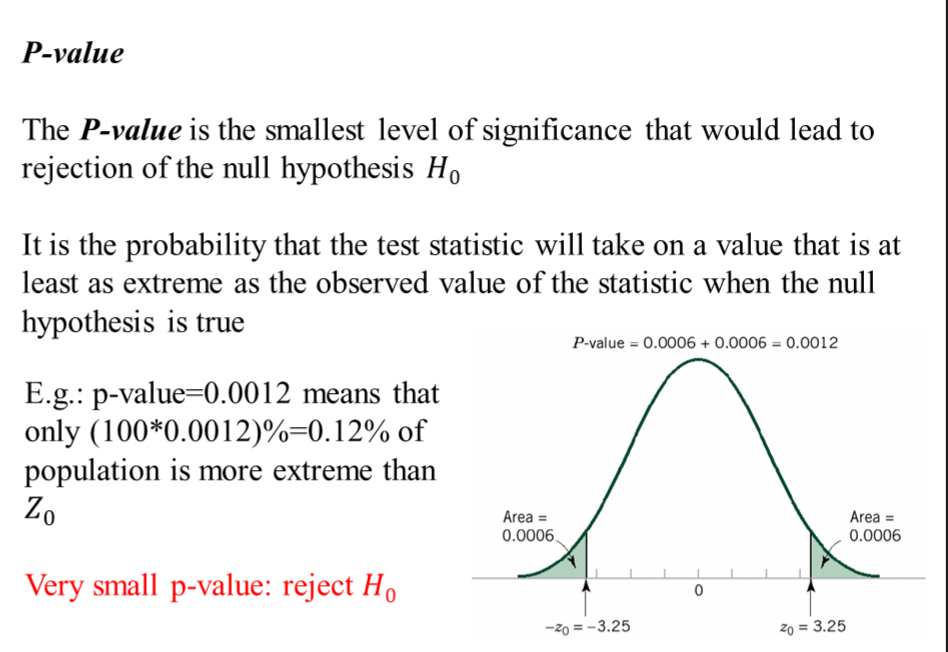
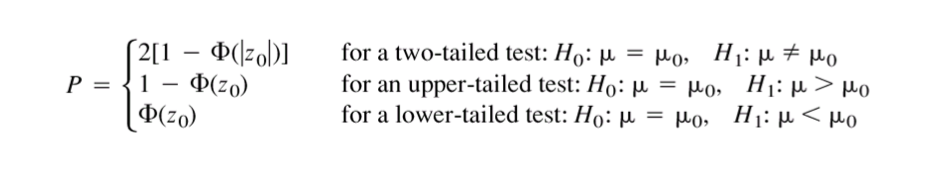

fare slide: specificare che per analizzare dati, devono rispettare ipotesi iid -> serve metodo per verificare assumptions



**<h1 style="color:orange">Modeling Process Data - importance of the assumptions</h1>**

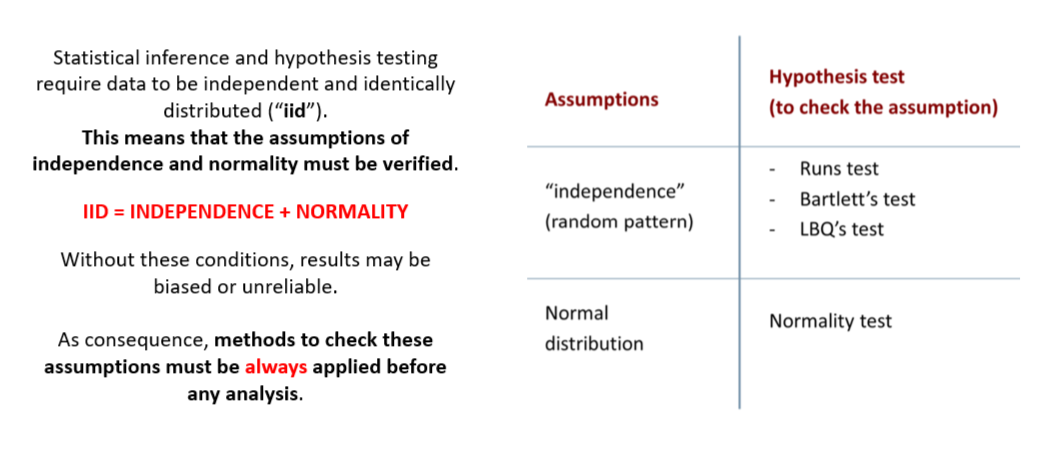


-----

# **EXERCISE 1 - ASSUMPTIONS CHECK AND HYPOTESIS TESTING**


A study was performed by ComputerTek Co to determine the time series of order processing durations. Data in the file `Ese_1.csv` refer to the period 1995, July – 1997, October. Each datum represents the time (in days) to ship the order.

*INDEPENDENCE ASSUMPTION:*

1. Determine the value of 𝑛 and 𝑚 in observed runs
2. Assuming that the runs distribution is random, which is the expected number of runs? And the 95% confidence interval for the number of runs?
3. Test the null hypothesis of observation randomness (significance level 5%)

*NORMALITY ASSUMPTION:*

4. Test the null hypothesis of observation normality (significance level 5%)

*HYPOTESIS TESTING AFTER THE ASSUMPTIONS CHECK:*

5. Assume to know that the variable representing the days to ship the order is normally distributed with mean 30 [days] and standard deviation (known) 7 [days]. 

    5.1 Is there statistical evidence to state that the mean life of neon lights is **larger** than 30 days (confidence level: 95%)?

    5.2 Is there statistical evidence to state that the mean life of neon lights is **different** from 30 days (confidence level: 95%)?

    5.3 Compute a two-sided and a one-sided (lower) 95% confidence interval for the mean of the days required for the shipping.

    5.4 Compute the power curve. 

6. Assume to know that the variable representing the days to ship the order is normally distributed with mean 30 [days], and the standard deviation is **unknown**. 

    6.1 Is there statistical evidence to state that the mean life of neon lights is **larger** than 31 days (confidence level: 95%)?

    6.2 Compute a two-sided and a one-sided (lower) 95% confidence interval for the mean of the days required for the shipping.

7. Compute the upper limit of the one-sided interval for the variance (99%) and the two-sided confidence interval for the standard deviation (98%)

8. Design a 95% prediction interval for future observations. 


<h3 style="color:grey">Solution</h5>

Preliminary activity: import and explorative analysis of the data

In [ ]:
# Import the dataset
data = pd.read_csv('days.csv')
data.head()

In [ ]:
n=len(data)
print("Number of points n = %d" % n) #number of points

mean = data.mean()
print('Mean = %.2f'% mean) # mean of the points

# Let's plot the data first
plt.plot(data, 'o-')
plt.hlines(mean, 0, n, colors='r', linestyles='dashed')
plt.xlabel('Week')
plt.ylabel('Days')
plt.grid()
plt.show()

In [ ]:
# Histogram and boxplot 

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  
axes[0].hist(data)
axes[0].set_title('Histogram')
axes[1].boxplot(data)
axes[1].set_title('Boxplot')

In [ ]:
data.describe()


## **INDEPENDENCE**

### Point 1: Determine the value of 𝑛 and 𝑚 in observed runs.

In [ ]:
# Get the number of points above the mean
m = data[data > mean].count()
print('Number of points above the mean, m = %d' % m) 

In [ ]:
# Create a new series with the mean subtracted from the original series
new_series = np.array(data - mean).flatten()

# Create a new series with the sign of the new series
new_series_sign = np.sign(new_series)

# Compute the difference between consecutive elements of the new series
# This series will be 0 when the sign doesn't change 
new_series_sign_diff = np.diff(new_series_sign)

# Count the number of runs
runs = (np.sum(new_series_sign_diff != 0) + 1)
print('Number of runs = %d' % runs) #number of runs

### Point 2: Assuming that the runs distribution is random, which is the expected number of runs?


In [ ]:
exp_runs= 2*m*(n-m)/n +1
print('Expected number of runs = %.3f' % exp_runs)

# Standard deviation of the number of runs
std_runs = np.sqrt((2*m*(n-m)*(2*m*(n-m)-n)/((n**2)*(n-1))))

#(1-alpha)% confidence interval
alpha = 0.05
conf_int= stats.norm.interval(1-alpha, loc=exp_runs, scale=std_runs)
print('Confidence interval: (%.3f, %.3f)' % (conf_int[0], conf_int[1]))

### Point 3: Test the null hypothesis of observation **randomness** (significance level 5%)



We can verify if the process is random by using :
1. time series plot (qualitative)
2. runs test (quantitative)
3. ACF/PACF (qualitative)
4. Bartlett’s test (quantitative)
5. LBQ test (quantitative)

In [ ]:
''' 
######### INDEPENDENCE ASSUMPTION TESTING WITH qda-toolkit ########

Runs test (performed by default):
    qda.Assumptions(data).independence()

Bartlett test at first lag:
    qda.Assumptions(data).independence(ac_test = 'bartlett', lag = 1)

LBQ test at generic lag k:
    qda.Assumptions(data).independence(ac_test = 'lbq', lag = K)

'''

#### *Runs test*
>
>   $ H_{0} $ : data is independent  vs  $ H_{1} $ : data is not independent
>

In [ ]:
# Runs test:
_ = qda.Assumptions(data['Days']).independence()

# p-value is higher than the significance level (alpha = 0.05), thus there is no evidence to reject the null hypotesis of independence  

#### *Bartlett's test*
>
>   Test for a specific lag $k$
>
>   $ H_{0} : \rho_{k}=0 $  vs  $ H_{1} : \rho_{k}\neq{0} $
>
>   
>
>   $ \rho_{k} $: true autocorrelation at lag $k$ 
>
>   $ r_{k} $: sample autocorrelation at lag $k$ 
>
>   Rejection region: $$ |r_{k}| \gt \frac{z_{\alpha/2}}{\sqrt{n}} $$

In [ ]:
# ACF PLOT AND BARTLETT TEST AT LAG 1

_ = qda.Assumptions(data['Days']).independence(ac_test='bartlett', lag=1)

# p-value is higher than the significance level (alpha = 0.05), thus there is no evidence to reject the null hypotesis of independence  

#### *Ljung-Box (LBQ) test*
> 
>   Global test at different lags
>
>   $ H_{0} : \rho_{k}=0, k=1,...,L $
>
>   $ H_{1} : \exists k \in [1,L]$ such that $\rho_{k}\neq{0} $
>
>   LBQ test statistic: 
>   $$ LBQ = n(n+2) \sum_{k=1}^L { \frac{r_{k}^2}{n-k} } $$
>
>   Under $ H_{0} $  ($\rho_{k}=0, k=1,...L $), 
>   $ LBQ \sim \chi_{L}^2 $, and its rejection region is: $$ LBQ \gt {\chi_{\alpha,L}^2 } $$


In [ ]:
lag_test = 3 # this is just an example; 

# Generally speaking: how many lags?
# Rule of thumb: L < sqrt(n)

_ = qda.Assumptions(data).independence(ac_test = 'lbq', lag = lag_test)

# p-value is higher than the significance level (alpha = 0.05), thus there is no evidence to reject the null hypotesis of independence  

## **NORMALITY**

### Point 4: Test the null hypothesis of observation **normality** (significance level 5%)


Normality can be tested with:
- Shapiro-wilk test
- Anderson-Darling test

#### *Shapiro-Wilk test*

In [ ]:
# Shapiro-Wilk test:
qda.Assumptions(data['Days']).normality()

# p-value is lower than the significance level (alpha = 0.05), thus there is evidence to reject the null hypotesis of normality!

#### *Anderson-Darling test*

In [ ]:
# Anderson-Darling test:
_ = qda.Assumptions(data['Days']).normality(test = 'anderson-darling')

# again, p-value is lower than the significance level (alpha = 0.05), thus there is evidence to reject the null hypotesis of independence

How much is this result influenced by the outlier? We can try to remove the outlier and check for normality again. 

In [ ]:
# Remove outlier (point 30) and check normality again 
data_out = data.drop(index=28)

qda.Assumptions(data_out['Days']).normality()

# after the outlier removal the p-value is higher than the significance level (alpha = 0.05), thus there is no evidence to reject the null hypotesis of independence


## **HYPOTESIS TESTING**

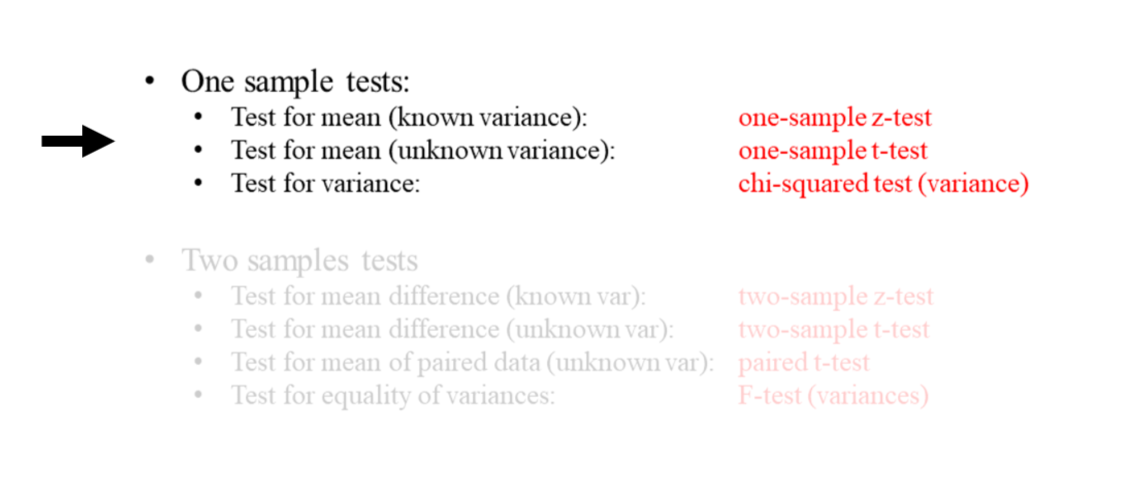

### Point 5: Z-test

Assume to know that the variable representing the days to ship the order is normally distributed with mean 30 [days] and standard deviation (known) 7 [days]. 


> #### **One-sample Z-test**
>
>    **Assumptions** 
>   - $X_1, X_2, ..., X_n$ is a random sample of size $n$ from a population.
>  - Population is **normal**.
> - The **variance** of the population is **known**. 
>
>    Under those assumptions, the quantity $Z$ follows a standard normal distribution $N(0,1)$.
>    $$ Z = \frac{\bar{X} - \mu}{{\sigma}/{\sqrt{n}}} $$
>
>
>    **Null hypothesis:**
>    $H_0: \mu = \mu_0$
>
>    Where:
>    - $\mu$ is the population mean
>    - $\mu_0$ is the hypothesized population mean
>    - *n* is the sample size 
>
>
>    **Test statistic:** 
>    $ Z_0 = \frac{\bar{X} - \mu_0}{{\sigma}/{\sqrt{n}}} $
>
>    <center>
>
>    | Alternative hypotheses | Rejection criterion |
>    |----------|----------|
>    | $H_1: \mu \neq \mu_0$ | $\|Z_0\| > z_{\alpha/2}$|
>    | $H_1: \mu > \mu_0$ | $Z_0 > z_{\alpha}$|
>    | $H_1: \mu < \mu_0$ | $Z_0 < -z_{\alpha}$|
>    </center>


#### 5.1 - *H0: μ = μ0  vs  H1: μ > μ0*
Is there statistical evidence to state that the mean life of neon lights is **larger** than 30 days? (confidence level: 95%)

In [ ]:
# Input data
mu = 30
sigma = 7
mu0 = 31
n = len(data_out['Days'])

CL = 0.95       # confidence level
alpha = 1 - CL  # significance level

> $H_0: \mu = \mu_0$ vs $H_1: \mu > \mu_0$


In [ ]:
#### ONE-SAMPLE Z-TEST ####

# Z-test statistic:
Z_0 = (mu - mu0) / (sigma / np.sqrt(n))
print("Test statistic Z_0 = %.3f" % Z_0)

# Critical value:
Z_alpha = stats.norm.ppf(1 - alpha)
print("Critical value Z_alpha = %.3f" % Z_alpha)

# Compare the test statistic to the critical value to determine whether to reject the null hypothesis. 
# If Z_0 > Z_alpha, then we reject the null hypothesis.

# p-value:  
pval = 1 - stats.norm.cdf(Z_0)
print("p-value = %.3f" % pval)

# If the p-value is less than the significance level, then we reject the null hypothesis:
if pval < alpha:
    print("Reject the null hypothesis.")
else:
    print("Accept the null hypothesis.")

In [ ]:
# Plot the normal distribution
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Distribution under H_0')

# Plot the critical region
x_fill = np.linspace(Z_alpha, 4, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Critical region')

# Plot the test statistic
plt.vlines(Z_0, 0, np.max(y), color='red', linestyles='dashed', label='Z_0')

# Plot the p-value region and will with a pattern
x_fill = np.linspace(Z_0, 4, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, facecolor='none', alpha=0.5, hatch='xxxx', label='p-value region')
plt.legend()

plt.show()

#### 5.2 - *H0: μ = μ0  vs  H1: μ ≠ μ0*

Is there statistical evidence to state that the mean life of neon lights is **different** from 30 days (confidence level: 95%)?

> $H_0: \mu = \mu_0$ vs $H_1: \mu \neq \mu_0$


In [ ]:
# Calculate the Z-statistic:
Z_0 = (mu - mu0) / (sigma / np.sqrt(n))
print("Test statistic Z_0 = %.3f" % Z_0)

# Compare the Z-statistic with the critical value:
z_alpha2 = stats.norm.ppf(1-alpha/2)                #inverse cumulative distribution f 

# p-VALUE (bilateral rejection region):
pval = 2 * ( 1 - stats.norm.cdf(np.abs(Z_0)) )  
print('p-value = %.3f' % pval)

print('Rejection limit = %.3f' % z_alpha2)
if np.abs(Z_0) > z_alpha2:
    print('Reject the null hypothesis at alpha = %.2f' % alpha)
else:
    print('Accept the null hypothesis at alpha = %.2f' % alpha)

#### 5.3 - Confidence Interval for the mean

Compute a two-sided and a one-sided (lower) 95% confidence interval for the mean of the days required for the shipping.

In [ ]:
# Two-sided CI, computed with z_alpha2 (bilateral rejection region):
CI = [np.mean(data_out['Days']) - z_alpha2 * sigma/np.sqrt(n), np.mean(data_out['Days']) + z_alpha2 * sigma/np.sqrt(n)]
print('Two-sided confidence interval: ( %.3f, %.3f )' % (CI[0],CI[1]))

# One-sided (lower) CI, computed with z_alpha (unilateral rejection region)::
Z_alpha = stats.norm.ppf(1 - alpha)
CI_lower = mu - Z_alpha * sigma / np.sqrt(n)
print("Lower bound of the confidence interval: %.3f" % CI_lower)

#### 5.4 - Power curve

Compute the power curve.

>The ***power*** of a statistical test is the probability of rejecting the null hypotesis $H_0$ when the alternative hypotesis is true. 
>
> The curve is:
>$$power = 1-\beta = P( reject H_0 | H_0 false )= 1-\Phi\left(Z_{\alpha/2} - \frac{\delta \sqrt{n}}{\sigma}\right) + \Phi\left(- Z_{\alpha/2} - \frac{\delta \sqrt{n}}{\sigma}\right)$$
>
>where $Z_{\alpha/2}$ is the critical value, $\delta$ is the difference between the hypothesized mean and the true mean, $\sigma$ is the standard deviation of the population, >and $n$ is the sample size.
>
> Reducing $\beta$, the power increases.
>
> The estimation of $\beta$ depends on $H_1$

In [ ]:
delta = np.linspace(0, 6, 100)
mu1 = mu0 + delta
power = 1 - stats.norm.cdf(z_alpha2 - delta * np.sqrt(n) / sigma) + stats.norm.cdf(-z_alpha2 - delta * np.sqrt(n) / sigma)

plt.plot(delta, power, label = "power (n)")
plt.xlabel("delta")
plt.ylabel("power")
plt.grid(True)
plt.legend()
plt.show()

### Point 6: t-test
Assume to know that the variable representing the days to ship the order is normally distributed with mean 30 [days], and the standard deviation is **unknown**.

>#### **One-sample t-test**
>
>**Assumptions** 
>- $X_1, X_2, ..., X_n$ is a random sample of size $n$ from a population.
>- Population is **normal**.
>- The **variance** of the population is <span style="color:orange">**unknown**</span>
>
>Under those assumptions, the quantity $T$ follows a Student-t distribution with $n-1$ degrees of freedom.
>$$ T = \frac{\bar{X} - \mu}{{S}/{\sqrt{n}}} $$
>Where:
>- $S$ is the sample standard deviation
>
>**Null hypothesis:** $H_0: \mu = \mu_0$
>
>**Test statistic:** $ t_0 = \frac{\bar{X} - \mu_0}{{S}/{\sqrt{n}}} $
>
><center>
>
>| Alternative hypotheses | Rejection criterion |
>|----------|----------|
>| $H_1: \mu \neq \mu_0$ | $\|t_0\| > t_{\alpha/2, n-1}$|
>| $H_1: \mu > \mu_0$ | $t_0 > t_{\alpha, n-1}$|
>| $H_1: \mu < \mu_0$ | $t_0 < -t_{\alpha, n-1}$|
>
></center>

#### 6.1 - *H0: μ = μ0  vs  H1: μ > μ0*

Is there statistical evidence to state that the mean life of neon lights is **larger** than 31 days? (confidence level: 95%)

In [ ]:
alpha = 1 - 0.95
mu0 = 31

t_0, pval = stats.ttest_1samp(data_out['Days'], mu0, alternative='greater')
print('Test statistic t_0 = %.3f' % t_0)
print('p-value = %.3f' % pval)

#### 6.2 - Confidence Interval for the mean

Compute a two-sided and a one-sided (lower) 95% confidence interval for the mean of the days required for the shipping.

In [ ]:
CL = 1 - alpha      # Confidence level
df = n - 1          # Degrees of freedom

t_alpha = stats.t.ppf(1-alpha, n-1)

# One-sided (lower):
CI_lower = np.mean(data_out['Days']) - t_alpha * np.std(data_out['Days'], ddof=1)/np.sqrt(n)
print('Lower bound of the one-sided confidence interval: %.3f' % (CI_lower))

# Two-sided:
CI = stats.t.interval(CL, df, loc=data_out['Days'].mean(), scale=data_out['Days'].std() / np.sqrt(n))
print('Confidence interval: (%.3f, %.3f)' % (CI[0], CI[1]))

In [ ]:
# Visualize the confidence interval on a dot plot:

plt.title('One-sided confidence interval for the mean with CL = %.2f' % CL)
plt.scatter(data_out['Days'], np.zeros(n), label='X')
# plot the confidence interval
plt.scatter(CI_lower, -0.01, label='C.I.', color='r', marker='|', s=100)
plt.plot([CI_lower, np.max(data_out['Days'])], [-0.01, -0.01], color='r')
plt.scatter(np.max(data_out['Days']), -0.01, color='r', marker='>', s=100)
# Add labels and legend
plt.ylim(-0.03, 0.03)
plt.xlabel('X')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

### Point 7: Chi-squared test

Compute the upper limit of the one-sided interval for the **variance** (98%) and the two-sided confidence interval for the **standard deviation** (98%).

> ### **Chi-squared test**
>
> The Chi-squared test statistic is:
> 
> $$\chi^2 = \frac{(n-1)S^2}{\sigma^2}$$
> 
> where $S^2$ is the sample variance and $\sigma^2$ is the population variance. 
> 
> The one-sided CI on the variance is computed from:
> 
> $$ \sigma^2 \leq \frac{(n-1)S^2}{\chi^2_{1-\alpha,n-1}}$$

In [ ]:
# One-sided (upper) CI for the variance:

alpha = 0.02
df = n - 1      
chi2 = stats.chi2.ppf(alpha, df)

CI_upper = df * data_out['Days'].var() / chi2
print('Upper bound of the one-sided CI on the variance: %.3f' % CI_upper)

In [ ]:
# Two-sided CI for the standard deviation:

chi2_1 = stats.chi2.ppf(alpha / 2, df)
chi2_2 = stats.chi2.ppf(1 - alpha / 2, df)

CI_var = [df * data_out['Days'].var() / chi2_2,
        df * data_out['Days'].var() / chi2_1]

CI_stdev_d = np.sqrt(CI_var)
print('Two-sided CI on the standard deviation (CL = %.2f): [%.3f, %.3f]' % (CL, CI_stdev_d[0], CI_stdev_d[1]))

### Point 8: Prediction interval

Design a 95% prediction interval for future observations.

In [ ]:
df = len(data_out['Days']) - 1
alpha = 0.05

Xbar = data_out['Days'].mean()
s = data_out['Days'].std()
t_alpha2 = stats.t.ppf(1 - alpha/2, df)

[pred_lo, pred_up] = [Xbar-t_alpha2*s,Xbar+t_alpha2*s]
print('Two-sided prediction interval: [%.3f %.3f]' % (pred_lo, pred_up))